In [1]:
# data/reuters_data.py

import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences

def load_data(num_words=10000, max_len=200):
    # Load Reuters dataset
    (x_train, y_train), (x_test, y_test) = tf.keras.datasets.reuters.load_data(num_words=num_words)

    # Pad sequences (each article to have the same length)
    x_train = pad_sequences(x_train, maxlen=max_len)
    x_test = pad_sequences(x_test, maxlen=max_len)

    return (x_train, y_train), (x_test, y_test)


In [2]:
# models/dense_model.py

import tensorflow as tf
from tensorflow.keras import layers, models

def build_dense_model(input_shape=(200,), num_classes=46, num_words=10000):
    model = models.Sequential([
        layers.Embedding(input_dim=num_words, output_dim=128, input_length=input_shape[0]),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(46, activation='softmax')  # Output layer for 46 classes
    ])

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',  # Sparse categorical cross-entropy for multi-class classification
                  metrics=['accuracy'])
    return model


In [3]:
# train.py

import tensorflow as tf
# from data.reuters_data import load_data
# from models.dense_model import build_dense_model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Load Reuters data
(x_train, y_train), (x_test, y_test) = load_data()

# Build the dense model
model = build_dense_model()

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-5)

# Train the model
history = model.fit(x_train, y_train, epochs=20,
                    validation_data=(x_test, y_test),
                    callbacks=[early_stopping, reduce_lr],
                    batch_size=64)

# Save the trained model
model.save('dense_reuters_model.keras')

# Save the training history
import pickle
with open('history.pkl', 'wb') as f:
    pickle.dump(history.history, f)


2110848/2110848 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


141/141 ━━━━━━━━━━━━━━━━━━━━ 12s 70ms/step - accuracy: 0.4007 - loss: 2.5741 - val_accuracy: 0.5957 - val_loss: 1.6234 - learning_rate: 0.0010
Epoch 2/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 10s 69ms/step - accuracy: 0.6351 - loss: 1.4775 - val_accuracy: 0.6732 - val_loss: 1.3353 - learning_rate: 0.0010
Epoch 3/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 11s 72ms/step - accuracy: 0.7761 - loss: 0.9137 - val_accuracy: 0.7017 - val_loss: 1.2726 - learning_rate: 0.0010
Epoch 4/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 9s 63ms/step - accuracy: 0.8601 - loss: 0.5916 - val_accuracy: 0.7057 - val_loss: 1.3039 - learning_rate: 0.0010
Epoch 5/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 11s 66ms/step - accuracy: 0.8897 - loss: 0.4307 - val_accuracy: 0.7079 - val_loss: 1.3834 - learning_rate: 0.0010
Epoch 6/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 10s 67ms/step - accuracy: 0.9123 - loss: 0.3467 - val_accuracy: 0.7102 - val_loss: 1.4279 - learning_rate: 0.0010
Epoch 7/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 8s 58ms/step - accuracy: 0.9361 - loss: 0.2641 -

In [5]:
# evaluate.py

import tensorflow as tf
# from data.reuters_data import load_data

# Load Reuters data
(x_train, y_train), (x_test, y_test) = load_data()

# Load the trained model
model = tf.keras.models.load_model('dense_reuters_model.keras')

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc}')


71/71 - 1s - 10ms/step - accuracy: 0.7017 - loss: 1.2726

Test accuracy: 0.7016919255256653


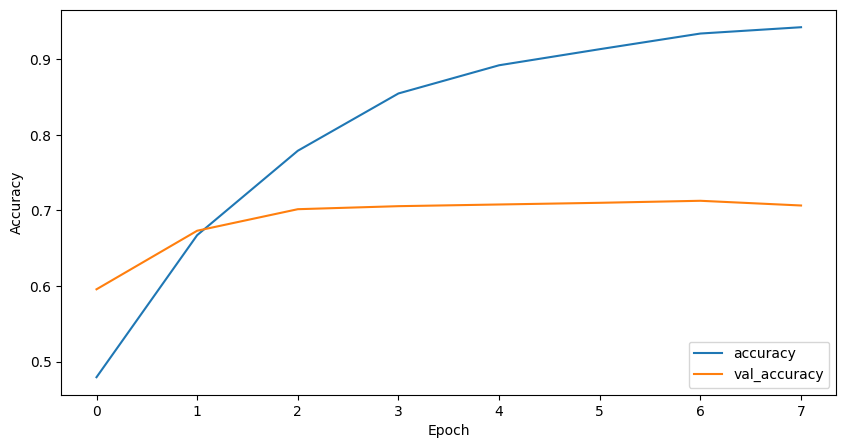

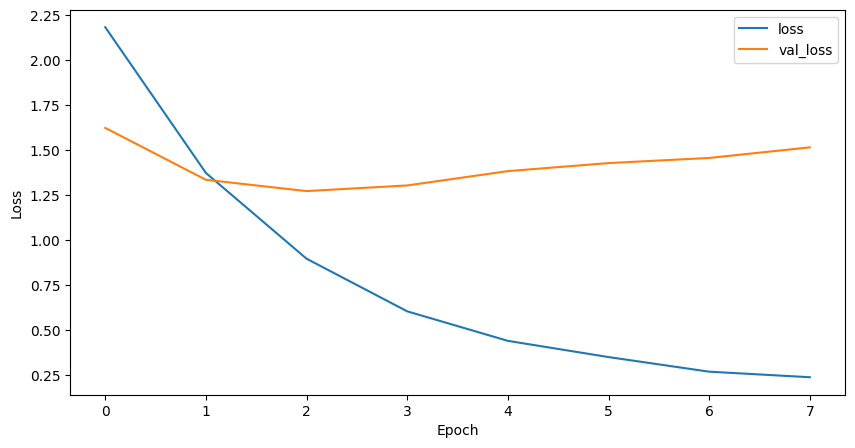

In [6]:
# utils/plot_history.py

import matplotlib.pyplot as plt
import pickle

def plot_history(history_file='history.pkl'):
    with open(history_file, 'rb') as f:
        history = pickle.load(f)

    plt.figure(figsize=(10, 5))
    plt.plot(history['accuracy'], label='accuracy')
    plt.plot(history['val_accuracy'], label='val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')
    plt.show()

    plt.figure(figsize=(10, 5))
    plt.plot(history['loss'], label='loss')
    plt.plot(history['val_loss'], label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')
    plt.show()

if __name__ == '__main__':
    plot_history()
